In [1]:
pip install tensorflow==2.8.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 497.6/497.6 MB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 45.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.5/462.5 kB 31.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 39.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 45.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 21.1 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.12.0
    Uninstalling keras-2.12.0:
      Successfully uninstalled keras-2.12.0
  Attempting uninstall: tensorboard-data-server
    Found existing installation: tensorboard-data-server 0.7.1
    Uninstalling tensorboard-data-server-0.7.1:
      Successfully uninstalled tensorboard-data-server-0.7.1
  Attempting uninstall: google-auth-oauthlib
    Found existing insta

In [2]:
import os
from glob import glob
from matplotlib import pyplot
import matplotlib.pyplot as plt
import tensorflow as tf
import random
import cv2
import pandas as pd
import numpy as np
import matplotlib.gridspec as gridspec
import seaborn as sns
import itertools
import sklearn
import itertools
import scipy
import skimage
from skimage.transform import resize
import csv
from tqdm import tqdm
from sklearn import model_selection
from sklearn.model_selection import train_test_split, learning_curve,KFold,cross_val_score,StratifiedKFold
from sklearn.metrics import confusion_matrix
import keras
from keras.utils import np_utils
from keras.utils.np_utils import to_categorical
#from tensorflow.keras.utils import load_img, img_to_array
from keras.preprocessing.image import load_img,img_to_array
from keras import models, layers, optimizers
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score


from keras.preprocessing.image import ImageDataGenerator

from keras.applications.vgg16 import VGG16
from keras.models import Model

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [3]:
import keras
from keras.preprocessing.image import load_img,img_to_array

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
''' Data Path '''
train_path = '/content/drive/MyDrive/FIRE'

In [6]:
File=[]
for f in os.listdir(train_path):
    File += [f]

'''  total number of classes '''
print(File)

['F (101).jpg', 'F (100).jpg', 'F (1).jpg', 'F (102).jpg', 'F (10).jpg', 'F (136).jpg', 'F (129).jpg', 'F (135).jpg', 'F (131).jpg', 'F (153).jpg', 'F (143).jpg', 'F (104).jpg', 'F (160).jpg', 'F (121).jpg', 'F (110).jpg', 'F (130).jpg', 'F (109).jpg', 'F (113).jpg', 'F (103).jpg', 'F (14).jpg', 'F (144).jpg', 'F (108).jpg', 'F (138).jpg', 'F (149).jpg', 'F (140).jpg', 'F (152).jpg', 'F (105).jpg', 'F (111).jpg', 'F (106).jpg', 'F (141).jpg', 'F (126).jpg', 'F (163).jpg', 'F (124).jpg', 'F (116).jpg', 'F (128).jpg', 'F (155).jpg', 'F (114).jpg', 'F (117).jpg', 'F (12).jpg', 'F (118).jpg', 'F (119).jpg', 'F (127).jpg', 'F (162).jpg', 'F (107).jpg', 'F (137).jpg', 'F (151).jpg', 'F (132).jpg', 'F (11).jpg', 'F (112).jpg', 'F (139).jpg', 'F (157).jpg', 'F (115).jpg', 'F (133).jpg', 'F (150).jpg', 'F (159).jpg', 'F (125).jpg', 'F (15).jpg', 'F (142).jpg', 'F (146).jpg', 'F (154).jpg', 'F (147).jpg', 'F (13).jpg', 'F (134).jpg', 'F (16).jpg', 'F (120).jpg', 'F (122).jpg', 'F (145).jpg', 'F 

In [12]:
''' reading images '''

train_data = []

''' label encoding '''
mapping={'FIRE':0, 'AMD':1}

count=0

for f in os.listdir(train_path):
    ''' joining path '''
    path = os.path.join(train_path, f)
    for im in os.listdir(path):
        ''' loading an image '''
        img = load_img(os.path.join(path, im), grayscale=False, color_mode='rgb', target_size=(150,150))
        ''' converting an image to array '''
        img = img_to_array(img)
        ''' scaling  '''
        img = img / 255.0
        ''' appending image to train_data '''
        train_data.append([img, count])
    count=count+1

NotADirectoryError: ignored

In [8]:
train_images, train_labels = zip(*train_data)


ValueError: ignored

In [9]:
''' converting labels into to_categorical '''
train_labels = to_categorical(train_labels)

''' coverting train_images into numpy array '''
train_images = np.array(train_images)

''' converting train_labesl into numpy array '''
train_labels = np.array(train_labels)

''' shaep of train_images and train_labels '''
print(train_images.shape)
print(train_labels.shape)

NameError: ignored

In [10]:
''' reshaping images '''
train_images = train_images.reshape(-1,150,150,3)


NameError: ignored

In [ ]:
''' train test split '''
X_train, X_test, y_train, y_test = train_test_split(train_images,train_labels, test_size=0.2,random_state=44)

In [ ]:
''' shape of X_train, X_test, y_train, y_test '''
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(560, 150, 150, 3)
(140, 150, 150, 3)
(560, 2)
(140, 2)


In [ ]:
''' data Augmentation '''
data_aug = ImageDataGenerator(horizontal_flip=True, vertical_flip=True, rotation_range=20, zoom_range=0.2,
                    width_shift_range=0.2, height_shift_range=0.2, shear_range=0.1, fill_mode="nearest")

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
model1 = VGG16(input_shape=(150,150,3),include_top=False,weights='imagenet',pooling='avg')

''' freezing layers '''
model1.trainable = False

In [ ]:
inp = model1.input
''' Hidden Layer '''
x = tf.keras.layers.Dense(128, activation='relu')(model1.output)
''' Classification Layer '''
out = tf.keras.layers.Dense(2, activation='sigmoid')(x)

''' Model '''
model_VGG16 = tf.keras.Model(inputs=inp, outputs=out)

''' compile the model '''
model_VGG16.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
''' training '''
history_VGG16 = model_VGG16.fit(data_aug.flow(X_train, y_train, batch_size=32), validation_data=(X_test, y_test), epochs=100)

Epoch 1/100
18/18 [==============================] - 4s 215ms/step - loss: 0.6258 - accuracy: 0.6679 - val_loss: 0.5865 - val_accuracy: 0.6929
Epoch 2/100
18/18 [==============================] - 5s 306ms/step - loss: 0.6053 - accuracy: 0.6625 - val_loss: 0.5838 - val_accuracy: 0.6214
Epoch 3/100
18/18 [==============================] - 4s 212ms/step - loss: 0.5866 - accuracy: 0.6661 - val_loss: 0.5766 - val_accuracy: 0.6429
Epoch 4/100
18/18 [==============================] - 4s 218ms/step - loss: 0.5732 - accuracy: 0.7125 - val_loss: 0.5558 - val_accuracy: 0.6714
Epoch 5/100
18/18 [==============================] - 6s 352ms/step - loss: 0.5613 - accuracy: 0.7357 - val_loss: 0.5280 - val_accuracy: 0.6929
Epoch 6/100
18/18 [==============================] - 4s 205ms/step - loss: 0.5522 - accuracy: 0.6929 - val_loss: 0.5181 - val_accuracy: 0.7000
Epoch 7/100
18/18 [==============================] - 4s 207ms/step - loss: 0.5717 - accuracy: 0.6911 - val_loss: 0.5046 - val_accuracy: 0.7643

In [13]:
# Viewing Model Summary
print(model_VGG16.summary())

NameError: ignored

In [ ]:
##### Checking and extracting the indexes of "Convolutional Layers"
t=list(model_VGG16.layers)



conv_index=[]
for i in range(len(t)):
  layer=t[i]
  if 'conv' in layer.name:
    conv_index.append(i)

print("Indexes of Convolutional Layers are ",conv_index)

Indexes of Convolutional Layers are  [1, 2, 4, 5, 7, 8, 9, 11, 12, 13, 15, 16, 17]


In [ ]:
##### Checking layer name and output shapes
for i in conv_index:
  layer=model_VGG16.layers[i]
  print("layer name is :{}            output Shape is : {}".format(layer.name,layer.output.shape))

layer name is :block1_conv1            output Shape is : (None, 150, 150, 64)
layer name is :block1_conv2            output Shape is : (None, 150, 150, 64)
layer name is :block2_conv1            output Shape is : (None, 75, 75, 128)
layer name is :block2_conv2            output Shape is : (None, 75, 75, 128)
layer name is :block3_conv1            output Shape is : (None, 37, 37, 256)
layer name is :block3_conv2            output Shape is : (None, 37, 37, 256)
layer name is :block3_conv3            output Shape is : (None, 37, 37, 256)
layer name is :block4_conv1            output Shape is : (None, 18, 18, 512)
layer name is :block4_conv2            output Shape is : (None, 18, 18, 512)
layer name is :block4_conv3            output Shape is : (None, 18, 18, 512)
layer name is :block5_conv1            output Shape is : (None, 9, 9, 512)
layer name is :block5_conv2            output Shape is : (None, 9, 9, 512)
layer name is :block5_conv3            output Shape is : (None, 9, 9, 512)


In [ ]:
###### For Demo Visualizing 1st convolutional layer output
M_conv_1=Model(inputs=model_VGG16.inputs, outputs=model_VGG16.layers[1].output)
M_conv_1.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
Total params: 1,792
Trainable params: 0
Non-trainable params: 1,792
_________________________________________________________________


In [ ]:
###### Loading Sample Image for the above layer
''' loading an image '''
img = load_img("/content/drive/MyDrive/Retina/AMD/AMD (29).jpg",target_size=(150,150))

''' converting img to array '''
img = img_to_array(img)

''' scaling '''
img = img / 255.0

''' expanding dimensions '''
img = np.expand_dims(img, axis=0)

feature_maps=M_conv_1.predict(img)

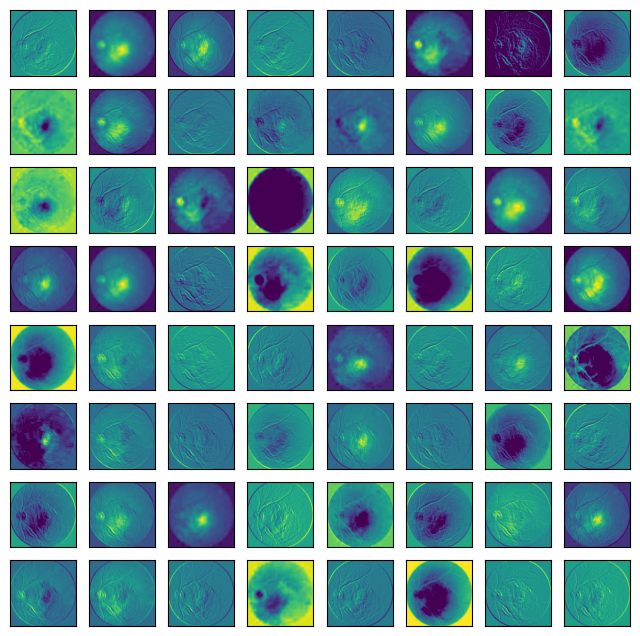

In [ ]:


from matplotlib import pyplot
square=8
ix=1
ax=pyplot.figure(figsize=(8,8))
for i in range(square):
  for j in range(square):
    ax=pyplot.subplot(square,square,ix)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_aspect('equal')

    pyplot.imshow(feature_maps[0,:,:,ix-1],aspect='auto',cmap="viridis")
    ix+=1


plt.savefig("CO1.tiff", format='tiff')
pyplot.show()


In [ ]:
##### Conv Layer 2
M_conv_2=Model(inputs=model_VGG16.inputs, outputs=model_VGG16.layers[5].output)
M_conv_2.summary()


Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
Total params: 260,160
Trainable params: 0
Non-trainable par

In [ ]:
feature_maps=M_conv_2.predict(img)

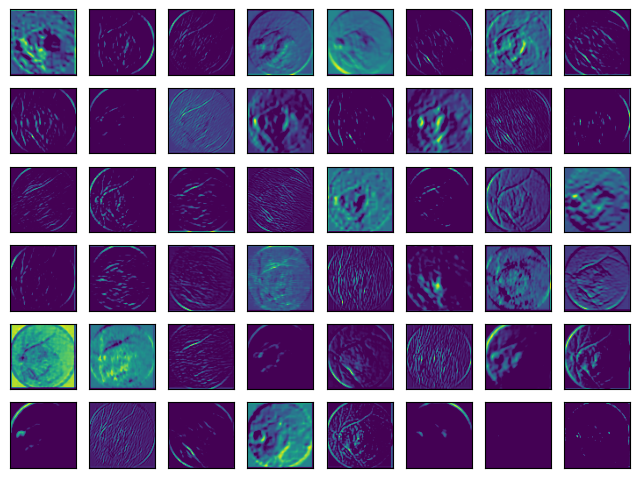

In [ ]:
from matplotlib import pyplot
square=8    # There are 128 images ouput for conv_2 layer so let plot 12*10 =120 images
ix=1
ax=pyplot.figure(figsize=(8,8))
for i in range(square):
  for j in range(square-2):
    ax=pyplot.subplot(square,square,ix)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_aspect('equal')

    pyplot.imshow(feature_maps[0,:,:,ix-1],aspect='auto',cmap="viridis")
    ix+=1


plt.savefig("CO2.tiff", format='tiff')
pyplot.show()

In [ ]:
##### Conv Layer 3
M_conv_3=Model(inputs=model_VGG16.inputs, outputs=model_VGG16.layers[9].output)
M_conv_3.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0   

In [ ]:
feature_maps=M_conv_3.predict(img)

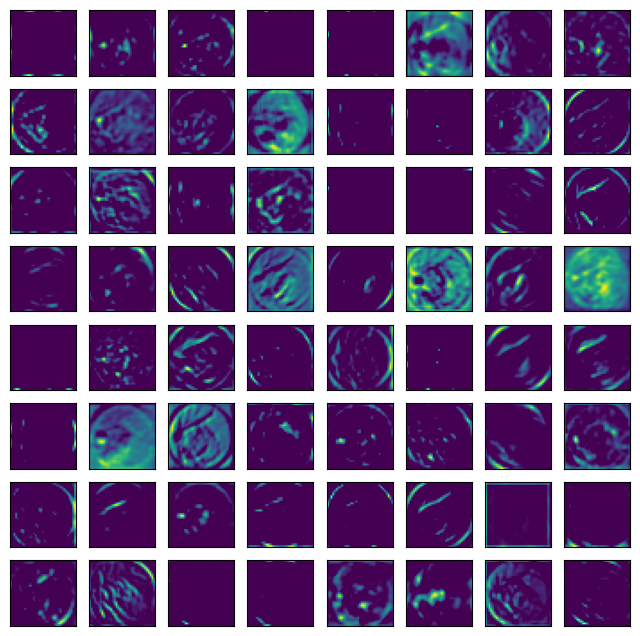

In [ ]:
from matplotlib import pyplot
square=8  # There are 256 images ouput for conv_3 layer, so let plot 16*16=256 Images
ix=1
ax=pyplot.figure(figsize=(8,8))
for i in range(square):
  for j in range(square):
    ax=pyplot.subplot(square,square,ix)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_aspect('equal')

    pyplot.imshow(feature_maps[0,:,:,ix-1],aspect='auto',cmap="viridis")
    ix+=1

plt.savefig("CO3.tiff", format='tiff')
pyplot.show()

In [ ]:
##### Conv Layer 4
M_conv_4=Model(inputs=model_VGG16.inputs, outputs=model_VGG16.layers[13].output)
M_conv_4.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0   

In [ ]:
feature_maps=M_conv_4.predict(img)

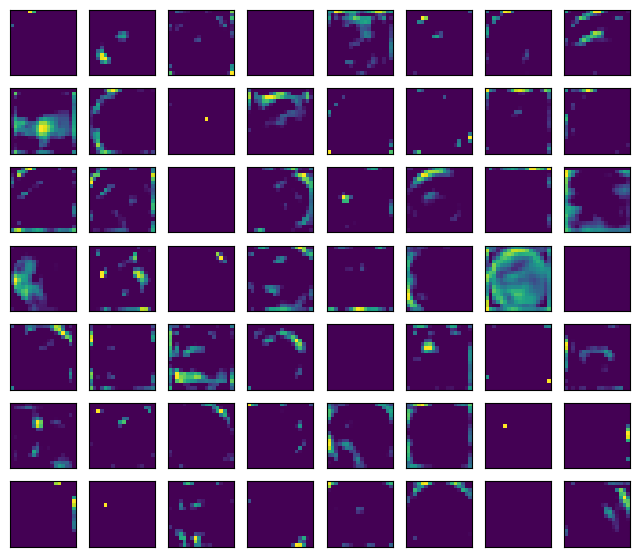

In [ ]:
from matplotlib import pyplot
square=8  #There are 512 Images at output of conv_4, so let plot 23*22=506 Images
ix=1
ax=pyplot.figure(figsize=(8,8))
for i in range(square):
  for j in range(square-1):
    ax=pyplot.subplot(square,square,ix)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_aspect('equal')

    pyplot.imshow(feature_maps[0,:,:,ix-1],aspect='auto',cmap="viridis")
    ix+=1


plt.savefig("CO4.tiff", format='tiff')
pyplot.show()

In [ ]:
##### Conv Layer 5
M_conv_5=Model(inputs=model_VGG16.inputs, outputs=model_VGG16.layers[17].output)
M_conv_5.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0   

In [ ]:
feature_maps=M_conv_5.predict(img)

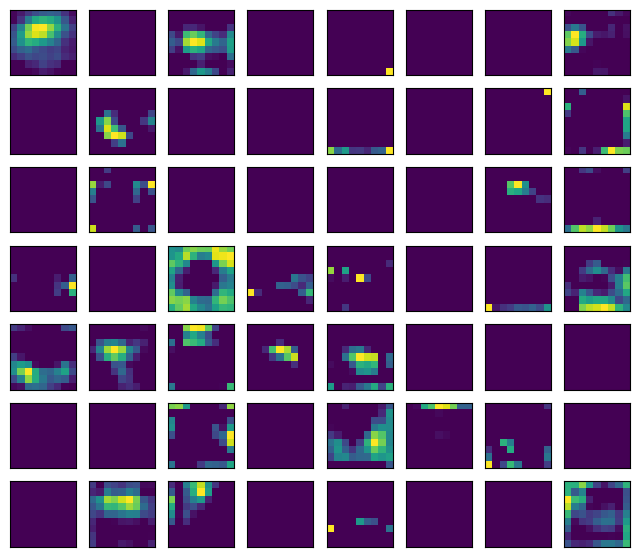

In [ ]:
from matplotlib import pyplot
square=8 #There are 512 Images at output of conv_5, so let plot 23*22=506 Images
ix=1
ax=pyplot.figure(figsize=(8,8))
for i in range(square):
  for j in range(square-1):
    ax=pyplot.subplot(square,square,ix)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_aspect('equal')

    pyplot.imshow(feature_maps[0,:,:,ix-1],aspect='auto',cmap="viridis")
    ix+=1

plt.savefig("CO5.tiff", format='tiff')
#pyplot.savefig("CO5.tiff",dim=500)
pyplot.show()

In [ ]:
#####################################  INTERMEDIATE LAYER EXTRACTION CODE END    ##################################

In [ ]:
''' prediction '''
y_pred= model_VGG16.predict(X_test)

''' retreiving max val from predicted values '''
pred = np.argmax(y_pred,axis=1)

''' retreiving max val from actual values '''
ground = np.argmax(y_test,axis=1)
from sklearn.metrics import classification_report
''' classificaion report '''
print(classification_report(ground,pred))

              precision    recall  f1-score   support

           0       0.66      0.95      0.78        73
           1       0.89      0.46      0.61        67

    accuracy                           0.71       140
   macro avg       0.77      0.70      0.69       140
weighted avg       0.77      0.71      0.70       140



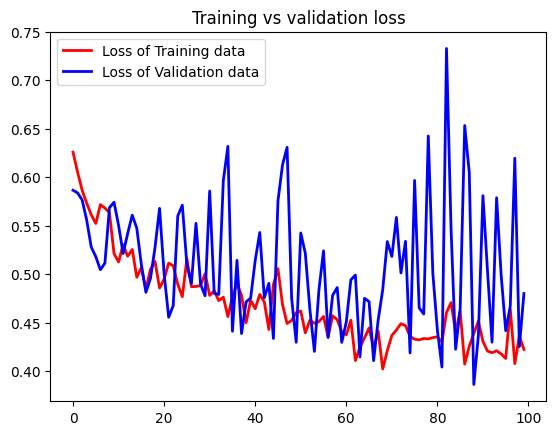

<Figure size 640x480 with 0 Axes>

In [ ]:
''' training loss and validation loss graph '''
epochs = range(100)
plt.plot(epochs, history_VGG16.history['loss'], 'r', label='Loss of Training data', linewidth=2)
plt.plot(epochs, history_VGG16.history['val_loss'], 'b', label='Loss of Validation data', linewidth=2)
plt.title('Training vs validation loss')
plt.legend(loc=0)
plt.figure()
plt.show()

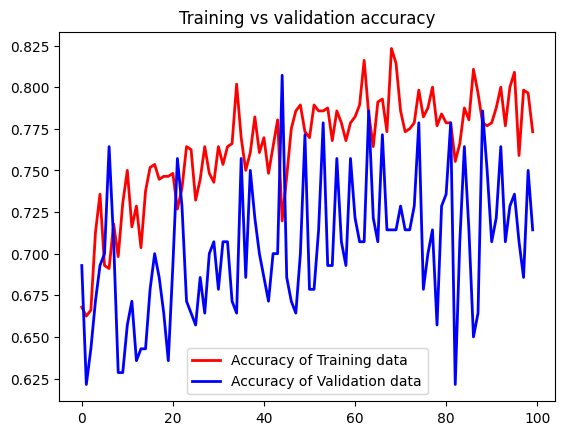

<Figure size 640x480 with 0 Axes>

In [ ]:
''' training accuracy and validation accuracy graph '''
epochs = range(100)
plt.plot(epochs, history_VGG16.history['accuracy'], 'r', label='Accuracy of Training data', linewidth=2)
plt.plot(epochs, history_VGG16.history['val_accuracy'], 'b', label='Accuracy of Validation data', linewidth=2)
plt.title('Training vs validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

In [ ]:
''' checking accuracy score'''
y_test_arg=np.argmax(y_test,axis=1)
Y_pred = np.argmax(model_VGG16.predict(X_test),axis=1)
accuracy = accuracy_score(y_test_arg, Y_pred)
print(accuracy)


0.7142857142857143


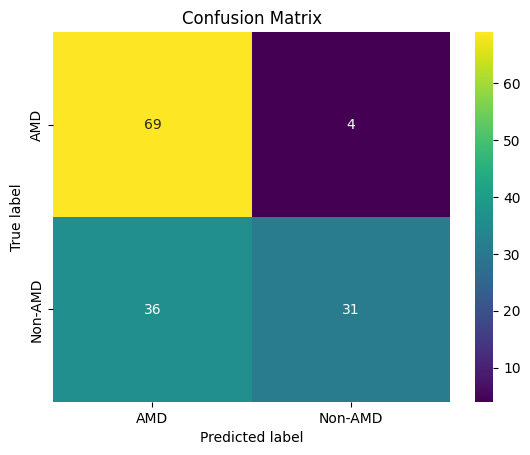

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test_arg, Y_pred)
f = sns.heatmap(cm, annot=True, fmt='d', cmap="viridis")
# labels, title and ticks
f.set_xlabel('Predicted label');f.set_ylabel('True label');
f.set_title('Confusion Matrix');
f.xaxis.set_ticklabels(['AMD', 'Non-AMD']); f.yaxis.set_ticklabels(['AMD', 'Non-AMD']);

In [ ]:
y_test_arg=np.argmax(y_test,axis=1)
Y_pred = np.argmax(model_VGG16.predict(X_test),axis=1)

In [ ]:
''' checking accuracy score'''
accuracy = accuracy_score(y_test_arg, Y_pred)
print(accuracy)

0.7142857142857143


# New Section

In [ ]:
# Evaluating Metrices

TP = cm[1][1]
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
print('True Positives:', TP)
print('True Negatives:', TN)
print('False Positives:', FP)
print('False Negatives:', FN)






True Positives: 31
True Negatives: 69
False Positives: 4
False Negatives: 36


In [ ]:
# calculate accuracy
conf_accuracy = (float (TP+TN) / float(TP + TN + FP + FN))

# calculate mis-classification
conf_misclassification = 1- conf_accuracy

# calculate the sensitivity
conf_sensitivity = (TP / float(TP + FN))
# calculate the specificity
conf_specificity = (TN / float(TN + FP))

# calculate precision
conf_precision = (TN / float(TN + FP))
# calculate NPV
conf_NPV = (TN / float(TN + FN))
# calculate f_1 score
conf_f1 = 4 * ((conf_precision * conf_sensitivity) / (conf_precision + conf_sensitivity))
print('-'*50)
print(f'Accuracy: {round(conf_accuracy,4)}')
print(f'Mis-Classification: {round(conf_misclassification,4)}')
print(f'Sensitivity: {round(conf_sensitivity,4)}')
print(f'Specificity: {round(conf_specificity,4)}')
print(f'Precision: {round(conf_precision,4)}')
print(f'NPV: {round(conf_NPV,4)}')
#print(f'f_1 Score: {round(conf_f1,2)}')

--------------------------------------------------
Accuracy: 0.7143
Mis-Classification: 0.2857
Sensitivity: 0.4627
Specificity: 0.9452
Precision: 0.9452
NPV: 0.6571


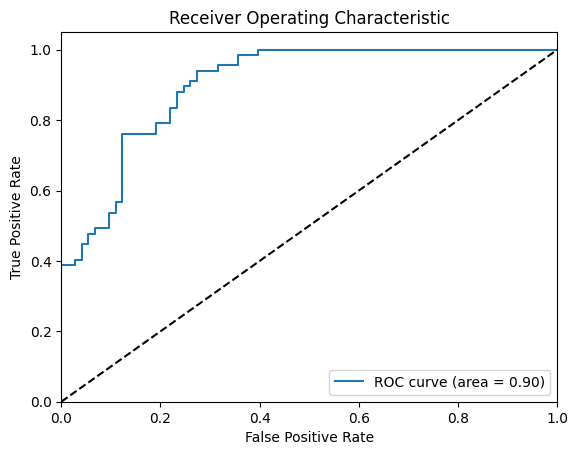

--------------------------------------------------
Accuracy: 0.7143
Mis-Classification: 0.2857
Sensitivity: 0.4627
Specificity: 0.9452
Precision: 0.9452
NPV: 0.6571
f_1 Score: 1.24


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Calculate accuracy
conf_accuracy = (float(TP + TN) / float(TP + TN + FP + FN))

# Calculate mis-classification
conf_misclassification = 1 - conf_accuracy

# Calculate sensitivity
conf_sensitivity = (TP / float(TP + FN))

# Calculate specificity
conf_specificity = (TN / float(TN + FP))

# Calculate precision
conf_precision = (TN / float(TN + FP))

# Calculate NPV
conf_NPV = (TN / float(TN + FN))

# Calculate f_1 score
conf_f1 = 4 * ((conf_precision * conf_sensitivity) / (conf_precision + conf_sensitivity))

# Calculate predicted probabilities
y_scores = model_VGG16.predict_on_batch(X_test)[:, 1]  # Assuming you have a model and input data (X) available

# Calculate false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test_arg, y_scores)  # Replace y_true with your true labels

# Calculate AUC score
auc = roc_auc_score(y_test_arg, y_scores)  # Replace y_true with your true labels

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

print('-' * 50)
print(f'Accuracy: {round(conf_accuracy, 4)}')
print(f'Mis-Classification: {round(conf_misclassification, 4)}')
print(f'Sensitivity: {round(conf_sensitivity, 4)}')
print(f'Specificity: {round(conf_specificity, 4)}')
print(f'Precision: {round(conf_precision, 4)}')
print(f'NPV: {round(conf_NPV, 4)}')
print(f'f_1 Score: {round(conf_f1, 2)}')
